# Objective:
    The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.


In [51]:
# import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

# Task:

## 1. Data Preparation:
    Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).


In [5]:
df = pd.read_excel(r"F:\Drive\ExcelR\Assignments\Decision Tree\Decision Tree\heart_disease.xlsx",sheet_name="Heart_disease")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


## 2. Exploratory Data Analysis (EDA):
    Perform exploratory data analysis to understand the structure of the dataset.
    Check for missing values, outliers, and inconsistencies in the data.
    Visualize the distribution of features, including histograms, box plots, and correlation matrices


In [6]:
# Check for missing values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [9]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')

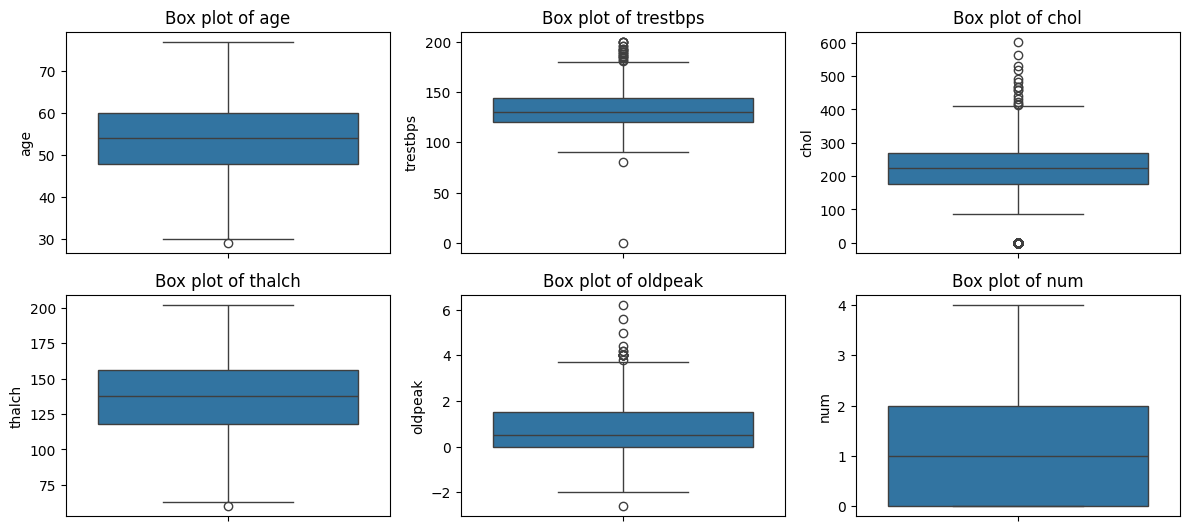

In [10]:
# Plot boxplots for numerical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

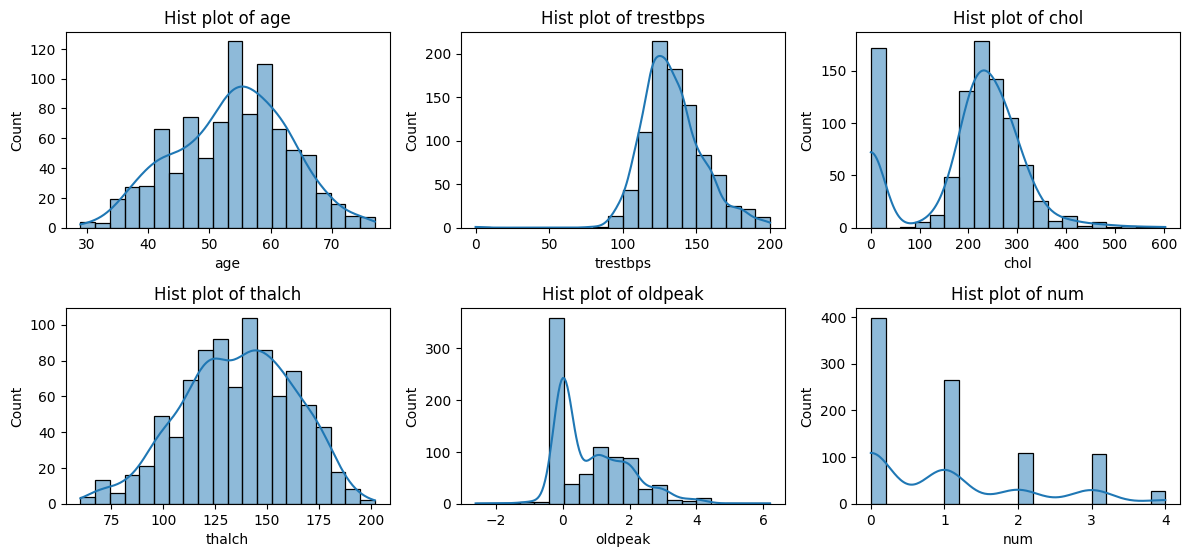

In [21]:
# Plot boxplots for numerical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Hist plot of {col}')
plt.tight_layout()
plt.show()

In [12]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [13]:
# Convert categorical columns to numeric using One-Hot Encoding
data_encoded = pd.get_dummies(df, drop_first=True)

In [14]:
correlation_matrix = data_encoded.corr()

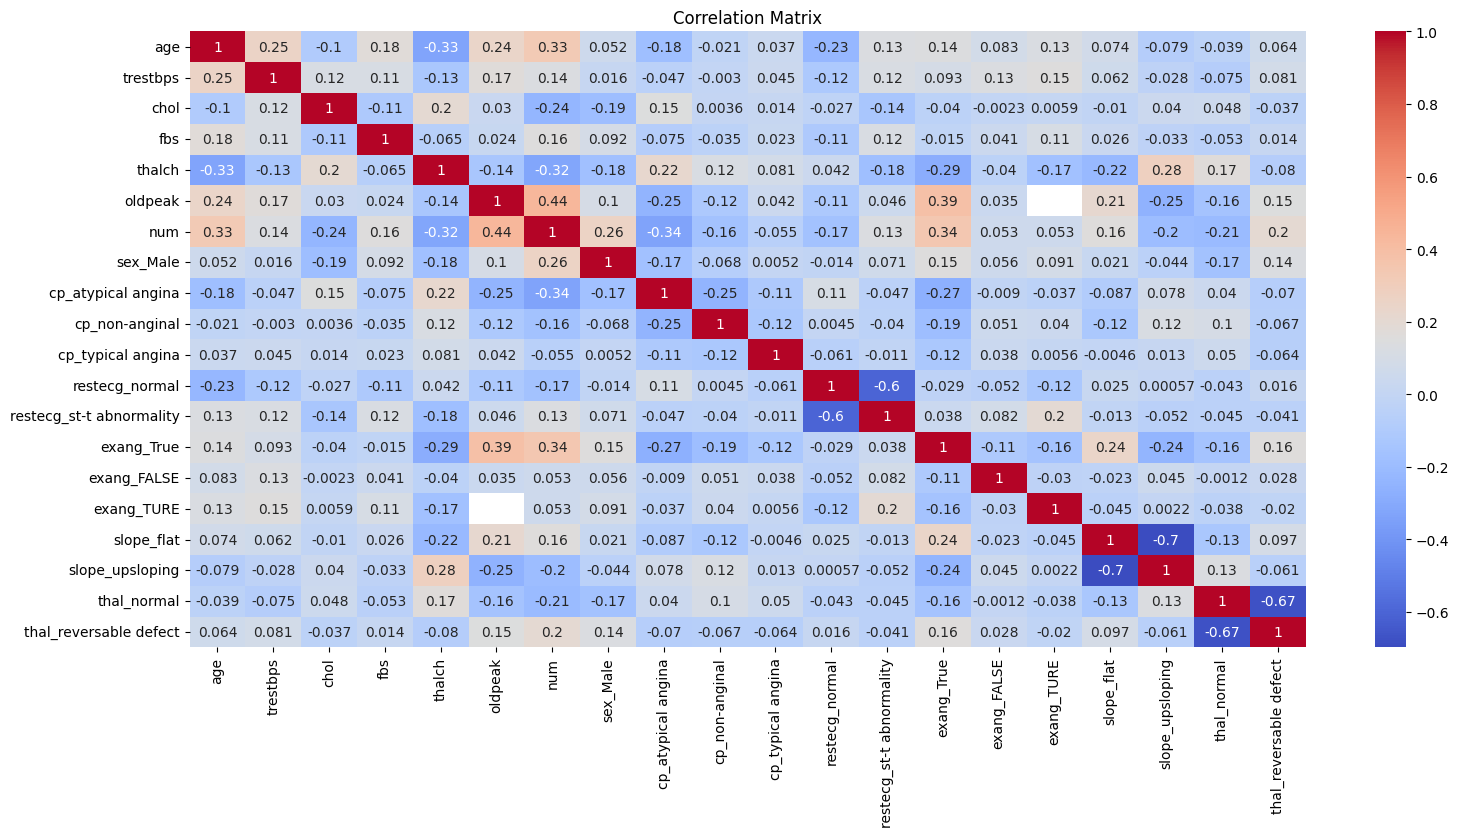

In [18]:
# Correlation matrix
plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## 3. Feature Engineering:
    If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.


In [23]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data_encoded), columns=data_encoded.columns)


In [24]:
scaled_data.head()

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1.006027,0.567394,0.281297,1.976894,0.524183,1.288612,-0.881977,0.514416,-0.471246,-0.536603,4.379244,-1.216912,-0.495522,-0.768240,-0.146193,-0.203186,-0.997800,-0.698945,-0.859921,-0.784639
1,-1.397560,0.076967,0.013526,-0.505844,-0.147705,-0.815249,-0.881977,0.514416,2.122034,-0.536603,-0.228350,0.821752,-0.495522,-0.768240,-0.146193,-0.203186,1.002205,-0.698945,-0.859921,-0.784639
2,0.350503,0.322181,-0.084656,-0.505844,0.449529,-0.449360,-0.881977,0.514416,-0.471246,-0.536603,-0.228350,0.821752,-0.495522,-0.768240,-0.146193,-0.203186,1.002205,-0.698945,-0.859921,-0.784639
3,-0.195767,-0.756760,-0.138211,-0.505844,2.017268,-0.815249,-0.881977,0.514416,-0.471246,-0.536603,4.379244,-1.216912,-0.495522,-0.768240,-0.146193,-0.203186,1.002205,-0.698945,-0.859921,-0.784639
4,0.350503,-1.149102,-0.004325,-0.505844,-0.371668,0.556834,-0.881977,0.514416,-0.471246,-0.536603,-0.228350,0.821752,-0.495522,1.301677,-0.146193,-0.203186,1.002205,-0.698945,-0.859921,-0.784639


## 4. Decision Tree Classification:
    Split the dataset into training and testing sets (e.g., using an 80-20 split).
    Implement a Decision Tree Classification model using a library like scikit-learn.
    Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).


In [26]:
# Split the data into features (X) and target (y)
X = scaled_data.drop('num', axis=1)  
y = scaled_data['num']

In [27]:
# Split the data into training and testing sets (
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
print(y_train.unique())

[-0.8819769  -0.00770286  1.74084524  0.86657119  2.61511929]


In [55]:
y_train = (y_train >= 1).astype(int)
y_test = (y_test >= 1).astype(int)

In [56]:
# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [57]:
# Predictions
y_pred = clf.predict(X_test)

In [58]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7582417582417582


In [59]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

Precision: 0.5135135135135135


In [60]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

Recall: 0.4222222222222222


In [61]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

F1 Score: 0.4634146341463415


In [62]:
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.6454176804541768


## 5. Hyperparameter Tuning:
    Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.


In [63]:
# Define the hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [64]:
# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [65]:
# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}


In [66]:
# Train the best model
best_clf = grid_search.best_estimator_

In [67]:
# Predictions
y_pred_best = best_clf.predict(X_test)

In [68]:
# Evaluation metrics for the tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

In [69]:
print(f"Best Accuracy: {accuracy_best}")
print(f"Best Precision: {precision_best}")
print(f"Best Recall: {recall_best}")
print(f"Best F1 Score: {f1_best}")
print(f"Best ROC AUC: {roc_auc_best}")

Best Accuracy: 0.7857142857142857
Best Precision: 0.6666666666666666
Best Recall: 0.26666666666666666
Best F1 Score: 0.38095238095238093
Best ROC AUC: 0.6114355231143552


## 6. Model Evaluation and Analysis:
    Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
    Visualize the decision tree structure to understand the rules learned by the model and identify important features


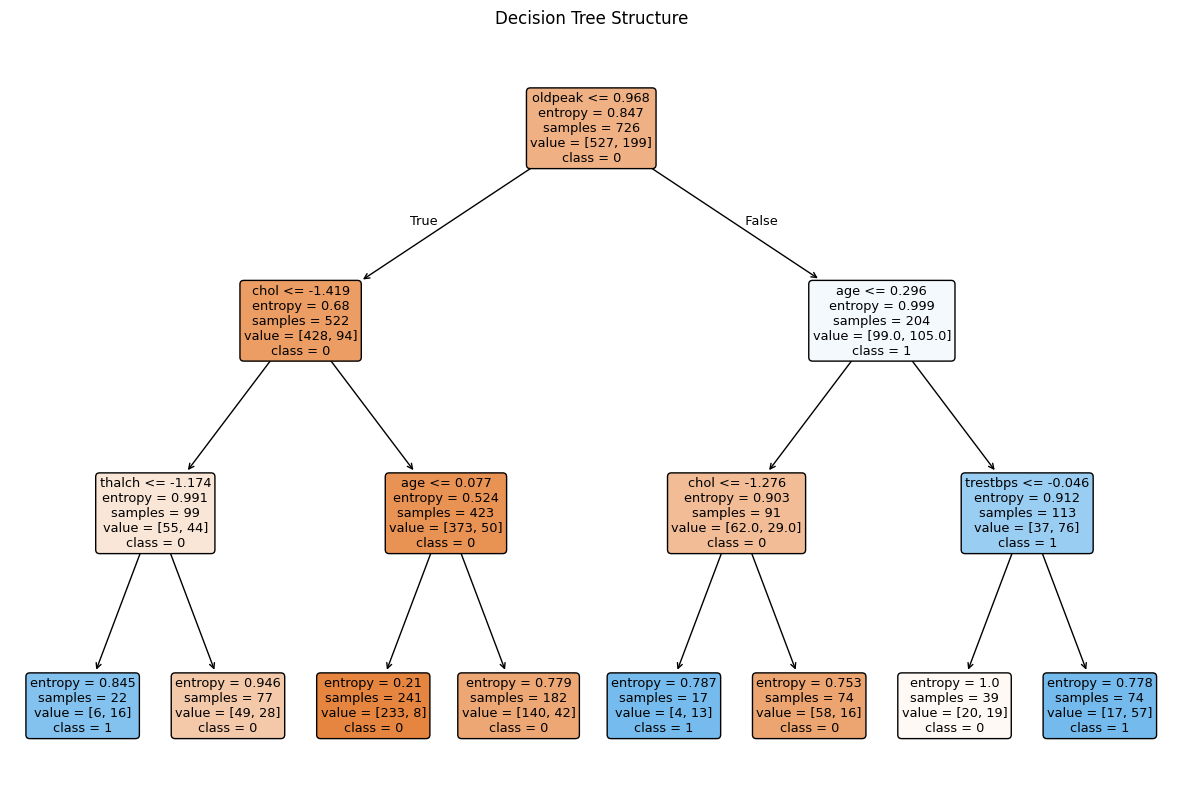

In [70]:
# Visualizing the decision tree
plt.figure(figsize=(15, 10))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True)
plt.title("Decision Tree Structure")
plt.show()

In [71]:
importances = best_clf.feature_importances_
features = pd.Series(importances, index=X.columns).sort_values(ascending=False)

In [72]:
features

oldpeak                     0.339235
chol                        0.291654
age                         0.288965
thalch                      0.040479
trestbps                    0.039667
exang_True                  0.000000
thal_normal                 0.000000
slope_upsloping             0.000000
slope_flat                  0.000000
exang_TURE                  0.000000
exang_FALSE                 0.000000
cp_typical angina           0.000000
restecg_st-t abnormality    0.000000
restecg_normal              0.000000
cp_non-anginal              0.000000
cp_atypical angina          0.000000
sex_Male                    0.000000
fbs                         0.000000
thal_reversable defect      0.000000
dtype: float64

# Interview Questions

### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Common hyperparameters of decision tree models and their effects:
- **max_depth:** Limits the maximum depth of the tree. Deeper trees tend to overfit, while shallower trees might underfit.
- **min_samples_split:** Specifies the minimum number of samples required to split an internal node. Higher values can prevent overfitting.
- **criterion:** Defines the function to measure the quality of a split ('gini' for the Gini impurity and 'entropy' for information gain).

### 2. What is the difference between the Label encoding and One-hot encoding?

- **Label Encoding:** Assigns a unique integer to each category (used for ordinal data).
- **One-Hot Encoding:** Converts categorical values into binary vectors (used for nominal data, where no order exists). It avoids implying any ordinal relationship between the categories.